In [1]:
import time
import pandas as pd
import numpy as np
pd.set_option('display.max_columns', 999)
pd.set_option('display.max_rows', 30)

# Get Supercoach Data

In [2]:
df_player_match_results = pd.read_csv('outputs/player_match_results.csv', index_col=0)
df_player_match_results['player_round_id'] = df_player_match_results['feed_id'].astype('str') + "_" + df_player_match_results['round_number_alt'].astype('str')
df_player_match_results

,round,coach_id,coach_team_id,coach_first_name,coach_team_name,player_id,played_position,points,on_field,feed_id,first_name,last_name,team,position,round_number_alt,player_round_id
0,1,180650,23345,Jordan,Pink Lloyd,221,MID,125,True,1002232,Andrew,Brayshaw,FRE,MID,R1,1002232_R1
1,2,180650,23345,Jordan,Pink Lloyd,221,MID,132,True,1002232,Andrew,Brayshaw,FRE,MID,R2,1002232_R2
2,3,180650,23345,Jordan,Pink Lloyd,221,MID,66,True,1002232,Andrew,Brayshaw,FRE,MID,R3,1002232_R3
3,4,180650,23345,Jordan,Pink Lloyd,221,MID,48,True,1002232,Andrew,Brayshaw,FRE,MID,R4,1002232_R4
4,1,180650,23345,Jordan,Pink Lloyd,222,MID,122,True,1002239,Adam,Cerra,FRE,MID,R1,1002239_R1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
699,4,300791,2016,Paul,At Witts End,120,RUC,102,True,298290,Marc,Pittonet,CAR,RUC,R4,298290_R4
700,4,300791,2016,Paul,At Witts End,102,FWD,51,True,1002228,Lachie,Fogarty,CAR,FWD,R4,1002228_R4
701,4,300791,2016,Paul,At Witts End,757,MID,79,False,281373,Jack,Redden,WCE,MID,R4,281373_R4
702,4,8258,23413,Simon,The West Wingard,212,FWD,86,True,293884,Jake,Stringer,ESS,FWD,R4,293884_R4


In [4]:
df_fixture_results = pd.read_csv('outputs/fixture_results.csv', index_col=0)
df_fixture_results

,round_number,match_name,home_team_id,home_team_name,home_team_coach,home_team_points,away_team_id,away_team_name,away_team_coach,away_team_points
0,1,Paul vs Mark,2016,At Witts End,Paul,1477,2018,Surviving J.Kelly,Mark,1657
0,1,Luke vs James,6510,The Big Short,Luke,1470,20240,MakingTheirMarcus,James,1558
0,1,Anthony vs Lester,20323,La MacRaena,Anthony,1691,22859,Ariana Grundy,Lester,1563
0,1,Jordan vs Simon,23345,Pink Lloyd,Jordan,1657,23413,The West Wingard,Simon,1235
0,2,Paul vs Luke,2016,At Witts End,Paul,1693,6510,The Big Short,Luke,1651
0,2,Anthony vs Mark,20323,La MacRaena,Anthony,1665,2018,Surviving J.Kelly,Mark,1464
0,2,Jordan vs James,23345,Pink Lloyd,Jordan,1537,20240,MakingTheirMarcus,James,1629
0,2,Simon vs Lester,23413,The West Wingard,Simon,1574,22859,Ariana Grundy,Lester,1642
0,3,Paul vs Anthony,2016,At Witts End,Paul,1469,20323,La MacRaena,Anthony,1679
0,3,Jordan vs Luke,23345,Pink Lloyd,Jordan,1488,6510,The Big Short,Luke,1586


In [5]:
df_fixture_results_by_team = pd.read_csv('outputs/fixture_results_by_team.csv', index_col=0)
df_fixture_results_by_team

,round_number,match_name,team_id,team_name,team_coach,team_points,opposition_team_id,opposition_team_name,opposition_team_coach,opposition_team_points,Rank,Opponent Rank
0,1,Anthony vs Lester,20323,La MacRaena,Anthony,1691,22859,Ariana Grundy,Lester,1563,1.0,4.0
0,1,Jordan vs Simon,23345,Pink Lloyd,Jordan,1657,23413,The West Wingard,Simon,1235,2.5,8.0
0,1,Paul vs Mark,2018,Surviving J.Kelly,Mark,1657,2016,At Witts End,Paul,1477,2.5,6.0
0,1,Anthony vs Lester,22859,Ariana Grundy,Lester,1563,20323,La MacRaena,Anthony,1691,4.0,1.0
0,1,Luke vs James,20240,MakingTheirMarcus,James,1558,6510,The Big Short,Luke,1470,5.0,7.0
...,...,...,...,...,...,...,...,...,...,...,...,...
0,4,Simon vs Anthony,20323,La MacRaena,Anthony,1627,23413,The West Wingard,Simon,1651,4.0,3.0
0,4,Paul vs Jordan,23345,Pink Lloyd,Jordan,1559,2016,At Witts End,Paul,1496,5.0,7.0
0,4,Lester vs Luke,6510,The Big Short,Luke,1552,22859,Ariana Grundy,Lester,1415,6.0,8.0
0,4,Paul vs Jordan,2016,At Witts End,Paul,1496,23345,Pink Lloyd,Jordan,1559,7.0,5.0


# Get Fanfooty Data
- Limit to 2020

In [7]:
df_fanfooty_player = pd.read_csv('exports/scrape_20210412-112944/fanfooty_match_data_20210412-112944.csv', index_col=0)
df_fanfooty_player = df_fanfooty_player.loc[df_fanfooty_player['Year'] == 2020]
df_fanfooty_player['player_round_id'] = df_fanfooty_player['Player ID'].astype('int').astype('str') + "_" + df_fanfooty_player['Round'].astype('str')
df_fanfooty_player

C:\Users\richardm\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3063: DtypeWarning: Columns (10,32) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,Fanfooty Match URL,Round,Year,Player ID,First Name,Surname,Team,null,DT,SC,null2,null3,null4,Kicks,Handballs,Marks,Tackles,Hitouts,Frees for,Frees against,Goals,Behinds,Not sure,Tag,Tag Notes,Tag 2,Tag 2 Notes,null5,null6,null7,null8,Position,Jumper Number,null9,null10,null11,DT own %,SC own %,AF own %,null12,AF Breakeven,null13,Contested Possessions,Clearances,Clangers,Disposal efficiency,Time on ground,Metres gained,player_round_id
Fanfooty Match ID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
7301,http://live.fanfooty.com.au/game/matchcentre.h...,R1,2020,290847.0,Dustin,Martin,RI,20,90,126,113,72,100,12,12,3,4,0,1,1,1,1,Full Time,gun,%D and %M with %T... %s as well,shovel,Rotating midfield and forward,562600.0,NaN,543000.0,NaN,Midfielder,4.0,0.0,0.0,0.0,0.0,0.0,0.0,674000.0,NaN,NaN,8.0,3.0,3.0,75.0,93.0,257.0,290847_R1
7301,http://live.fanfooty.com.au/game/matchcentre.h...,R1,2020,290627.0,Dion,Prestia,RI,25,89,118,112,72,102,11,14,2,5,0,2,2,1,0,Full Time,star,%P and %M plus %T... %s as well,shovel,Playing inside midfield,528700.0,NaN,550200.0,NaN,Midfielder,3.0,0.0,0.0,0.0,0.0,0.0,0.0,618000.0,NaN,NaN,7.0,2.0,4.0,72.0,79.0,546.0,290627_R1
7301,http://live.fanfooty.com.au/game/matchcentre.h...,R1,2020,993993.0,Shai,Bolton,RI,21,83,102,104,68,82,11,2,6,2,0,1,0,3,1,Full Time,hot,%D with %k by foot... also %M and %T... and bo...,pocket,Starting in a FP,231600.0,NaN,379100.0,NaN,Midfielder,29.0,0.0,0.0,0.0,0.0,0.0,0.0,223000.0,NaN,NaN,3.0,1.0,2.0,69.0,85.0,416.0,993993_R1
7301,http://live.fanfooty.com.au/game/matchcentre.h...,R1,2020,998529.0,Ivan,Soldo,RI,16,71,100,83,61,71,4,6,2,3,25,3,0,0,1,Full Time,ruck,%H... also %D and %M with %T... %s as well... ...,NaN,NaN,264800.0,NaN,411200.0,NaN,Ruck,20.0,0.0,0.0,0.0,0.0,0.0,0.0,359000.0,NaN,NaN,9.0,5.0,0.0,90.0,58.0,133.0,998529_R1
7301,http://live.fanfooty.com.au/game/matchcentre.h...,R1,2020,1000981.0,Daniel,Rioli,RI,16,69,99,86,57,72,8,4,3,3,0,1,1,3,0,Full Time,wing,%s from %D and %M with %T... Starting forward,NaN,NaN,380700.0,NaN,321800.0,NaN,Forward,17.0,0.0,0.0,0.0,0.0,0.0,0.0,480000.0,NaN,NaN,5.0,0.0,1.0,91.0,81.0,246.0,1000981_R1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7463,http://live.fanfooty.com.au/game/matchcentre.h...,R22,2020,293883.0,Jed,Bews,GE,2,29,19,18,22,33,5,4,0,2,0,1,1,0,0,Full Time,guard,%D and %T... Playing small defender,NaN,NaN,NaN,NaN,NaN,NaN,Back,24.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,4.0,1.0,4.0,55.0,72.0,128.0,293883_R22
7463,http://live.fanfooty.com.au/game/matchcentre.h...,R22,2020,1007102.0,Mark,O'Connor,GE,1,26,52,19,21,30,3,6,0,1,0,1,0,0,0,Full Time,guard,%O... Rotating in defence,NaN,NaN,NaN,NaN,NaN,NaN,Back,42.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,5.0,1.0,2.0,55.0,78.0,115.0,1007102_R22
7463,http://live.fanfooty.com.au/game/matchcentre.h...,R22,2020,291357.0,Gary,Rohan,GE,2,25,44,21,18,24,3,2,1,2,0,1,0,0,0,Full Time,batman,%D and %T... Starting at half forward on Grimes,NaN,NaN,NaN,NaN,NaN,NaN,Forward,23.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,4.0,0.0,2.0,40.0,91.0,48.0,291357_R22


# Get fanfooty data for each Supercoach Player that played

In [8]:
# df_player_match_results
df_sc_merged_player = pd.merge(df_player_match_results, df_fanfooty_player, how='left', on='player_round_id')
df_sc_merged_player

,round,coach_id,coach_team_id,coach_first_name,coach_team_name,player_id,played_position,points,on_field,feed_id,first_name,last_name,team,position,round_number_alt,player_round_id,Fanfooty Match URL,Round,Year,Player ID,First Name,Surname,Team,null,DT,SC,null2,null3,null4,Kicks,Handballs,Marks,Tackles,Hitouts,Frees for,Frees against,Goals,Behinds,Not sure,Tag,Tag Notes,Tag 2,Tag 2 Notes,null5,null6,null7,null8,Position,Jumper Number,null9,null10,null11,DT own %,SC own %,AF own %,null12,AF Breakeven,null13,Contested Possessions,Clearances,Clangers,Disposal efficiency,Time on ground,Metres gained
0,1,180650,23345,Jordan,Pink Lloyd,221,MID,125,True,1002232,Andrew,Brayshaw,FRE,MID,R1,1002232_R1,http://live.fanfooty.com.au/game/matchcentre.h...,R1,2020.0,1002232.0,Andrew,Brayshaw,FR,2.0,44.0,66,26.0,35.0,50.0,7.0,7.0,1.0,1.0,0.0,0.0,0.0,0.0,2.0,Full Time,shovel,%P and %s... Playing in midfield,NaN,NaN,418500.0,NaN,382800.0,NaN,Midfielder,8.0,0.0,0.0,0.0,0.0,0.0,0.0,485000.0,NaN,NaN,7.0,3.0,0.0,71.0,65.0,173.0
1,2,180650,23345,Jordan,Pink Lloyd,221,MID,132,True,1002232,Andrew,Brayshaw,FRE,MID,R2,1002232_R2,http://live.fanfooty.com.au/game/matchcentre.h...,R2,2020.0,1002232.0,Andrew,Brayshaw,FR,9.0,72.0,88,58.0,58.0,78.0,8.0,11.0,4.0,3.0,0.0,2.0,0.0,0.0,0.0,Full Time,shovel,%P and %M plus %T... Playing in midfield,NaN,NaN,418500.0,NaN,NaN,NaN,Midfielder,8.0,0.0,0.0,0.0,0.0,0.0,0.0,485000.0,NaN,NaN,12.0,6.0,3.0,63.0,74.0,203.0
2,3,180650,23345,Jordan,Pink Lloyd,221,MID,66,True,1002232,Andrew,Brayshaw,FRE,MID,R3,1002232_R3,http://live.fanfooty.com.au/game/matchcentre.h...,R3,2020.0,1002232.0,Andrew,Brayshaw,FR,9.0,54.0,82,68.0,43.0,60.0,3.0,10.0,3.0,4.0,0.0,0.0,0.0,0.0,0.0,Full Time,shovel,%O with %b by hand... also %T and %M... Playin...,NaN,NaN,NaN,NaN,NaN,NaN,Midfielder,8.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,4.0,2.0,1.0,92.0,68.0,45.0
3,4,180650,23345,Jordan,Pink Lloyd,221,MID,48,True,1002232,Andrew,Brayshaw,FRE,MID,R4,1002232_R4,http://live.fanfooty.com.au/game/matchcentre.h...,R4,2020.0,1002232.0,Andrew,Brayshaw,FR,8.0,53.0,78,49.0,40.0,57.0,5.0,8.0,1.0,5.0,0.0,2.0,1.0,0.0,0.0,Full Time,shovel,%P and %T... Playing in midfield,NaN,NaN,NaN,NaN,NaN,NaN,Midfielder,8.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,6.0,2.0,2.0,84.0,78.0,70.0
4,1,180650,23345,Jordan,Pink Lloyd,222,MID,122,True,1002239,Adam,Cerra,FRE,MID,R1,1002239_R1,http://live.fanfooty.com.au/game/matchcentre.h...,R1,2020.0,1002239.0,Adam,Cerra,FR,8.0,43.0,54,37.0,43.0,61.0,4.0,11.0,4.0,1.0,0.0,1.0,3.0,0.0,1.0,Full Time,wing,%D including %B... also %M... and kicked %s......,NaN,NaN,365200.0,NaN,338900.0,NaN,Midfielder,5.0,0.0,0.0,0.0,0.0,0.0,0.0,432000.0,NaN,NaN,3.0,2.0,3.0,93.0,73.0,207.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
699,4,300791,2016,Paul,At Witts End,120,RUC,102,True,298290,Marc,Pittonet,CAR,RUC,R4,298290_R4,http://live.fanfooty.com.au/game/matchcentre.h...,R4,2020.0,298290.0,Marc,Pittonet,CA,11.0,63.0,94,46.0,55.0,68.0,8.0,3.0,3.0,2.0,20.0,2.0,2.0,0.0,0.0,Full Time,ruck,%H... also %D and %T... Rotating in ruck,NaN,NaN,NaN,NaN,NaN,NaN,Ruck,27.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,7.0,8.0,2.0,63.0,83.0,273.0
700,4,300791,2016,Paul,At Witts End,102,FWD,51,True,1002228,Lachie,Fogarty,CAR,FWD,R4,1002228_R4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
701,4,300791,2016,Paul,At Witts End,757,MID,79,False,281373,Jack,Redden,WCE,MID,R4,281373_R4,http://live.fanfooty.com.au/game/matchcentre.h...,R4,2020.0,281373.0,Jack,Redden,WC,5.0,55.0,72,43.0,44.0,57.0,7.0,5.0,5.0,2.0,0.0,1.0,0.0,0.0,0.0,Full Time,shovel,%D and %M with %T... Playing inside midfield,NaN,NaN,NaN,NaN,NaN,NaN,Midfielder,8.0,0.0,0.0,0.0,0.0,0.0,0.

# Fixture Difficulty

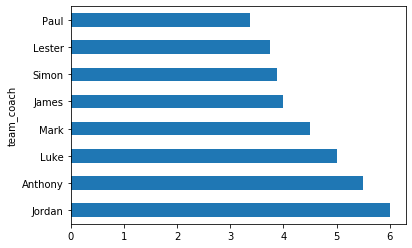

In [9]:
# df_combined_fixture_results_by_team['Rank'] = df_combined_fixture_results_by_team.groupby('round_number')['team_points'].rank(ascending=False)
# df_combined_fixture_results_by_team['Oppenent Rank'] = df_combined_fixture_results_by_team.groupby('round_number')['opposition_team_points'].rank(ascending=False)
# df_combined_fixture_results_by_team = df_combined_fixture_results_by_team.sort_values(['round_number', 'Rank'])
df_fixture_difficulty = df_fixture_results_by_team.groupby('team_coach')['Opponent Rank'].agg('mean').sort_values(ascending=False)
plot_fixture_difficulty = df_fixture_difficulty.plot(kind='barh', x='Opponent Rank', y='team_coach')

plot_fixture_difficulty

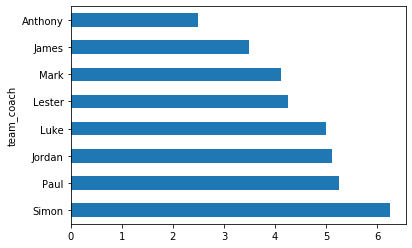

In [10]:
df_fixture_strength = df_fixture_results_by_team.groupby('team_coach')['Rank'].agg('mean').sort_values(ascending=False)
plot_fixture_strength = df_fixture_strength.plot(kind='barh', x='Rank', y='team_coach')

plot_fixture_strength

# Ladder Tracker

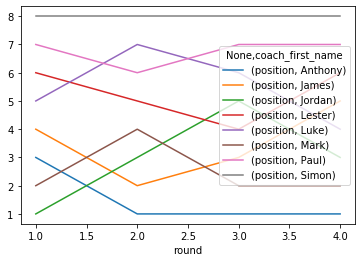

In [11]:
# Ladder position change throughout season
df_combined_weekly_ladders = pd.read_csv("outputs/ladder.csv", index_col=0)
df_grouped_ladder = pd.pivot_table(df_combined_weekly_ladders, index=['round'], columns=['coach_first_name'], values=['position'])
plot = df_grouped_ladder.plot(kind='line')
plot

# Free Agent, Waiver, and Trade Picks

In [12]:
df_transactions = pd.read_csv('outputs/transactions.csv', index_col=0)

In [13]:
df_transactions

,round,user_team_id,processed,player_id,player.feed_id,player.first_name,player.last_name,player.team.abbrev,dropped_player_id,dropped_player.feed_id,dropped_player.first_name,dropped_player.last_name,dropped_player.team.abbrev,source
0,3,186,2020-06-15 20:17:51,522,294469.0,Aliir,Aliir,PTA,NaN,NaN,NaN,NaN,NaN,Trade
1,3,186,2020-06-15 20:17:51,574,1021660.0,Mate,Colina,RIC,NaN,NaN,NaN,NaN,NaN,Trade
9,5,9856,2020-07-01 21:22:52,715,1002404.0,Aaron,Naughton,WBD,NaN,NaN,NaN,NaN,NaN,Trade
2,5,9856,2020-07-01 21:22:52,328,1015889.0,Max,Holmes,GEE,NaN,NaN,NaN,NaN,NaN,Trade
3,5,9856,2020-07-01 21:22:52,637,1004985.0,Ben,Paton,STK,NaN,NaN,NaN,NaN,NaN,Trade
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20,2,23345,2021-03-23 05:03:14,424,1000963.0,Harry,Morrison,HAW,260.0,1009199.0,Noah,Anderson,GCS,Free Agent
23,2,23413,2021-03-23 07:22:04,474,1002282.0,Charlie,Spargo,MEL,59.0,293479.0,Cameron,Ellis-Yolmen,BRL,Free Agent
15,2,22859,2021-03-23 07:32:07,523,297354.0,Karl,Amon,PTA,624.0,295584.0,Bradley,Hill,STK,Free Agent
4,2,2018,2021-03-23 08:33:46,248,293854.0,Matt,Taberner,FRE,54.0,990609.0,Charlie,Cameron,BRL,Free Agent


In [14]:
def get_transaction_status(row):
    post_transaction_list = pd.DataFrame()
    round_number = row['round']
    feed_id = row['player.feed_id']
    source = row['source']
    player_rows = df_player_match_results.loc[(df_player_match_results['round'] >= round_number) & (df_player_match_results['feed_id'] == feed_id), :]
    player_rows['source'] = source
    if len(player_rows) > 0:
        df_player_match_results.update(player_rows)

df_player_match_results['source'] = "Draft"
df_transactions.apply(lambda row: get_transaction_status(row), axis=1)
df_player_match_results

C:\Users\richardm\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


,round,coach_id,coach_team_id,coach_first_name,coach_team_name,player_id,played_position,points,on_field,feed_id,first_name,last_name,team,position,round_number_alt,player_round_id,source
0,1.0,180650.0,23345.0,Jordan,Pink Lloyd,221.0,MID,125.0,True,1002232.0,Andrew,Brayshaw,FRE,MID,R1,1002232_R1,Draft
1,2.0,180650.0,23345.0,Jordan,Pink Lloyd,221.0,MID,132.0,True,1002232.0,Andrew,Brayshaw,FRE,MID,R2,1002232_R2,Draft
2,3.0,180650.0,23345.0,Jordan,Pink Lloyd,221.0,MID,66.0,True,1002232.0,Andrew,Brayshaw,FRE,MID,R3,1002232_R3,Draft
3,4.0,180650.0,23345.0,Jordan,Pink Lloyd,221.0,MID,48.0,True,1002232.0,Andrew,Brayshaw,FRE,MID,R4,1002232_R4,Draft
4,1.0,180650.0,23345.0,Jordan,Pink Lloyd,222.0,MID,122.0,True,1002239.0,Adam,Cerra,FRE,MID,R1,1002239_R1,Draft
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
699,4.0,300791.0,2016.0,Paul,At Witts End,120.0,RUC,102.0,True,298290.0,Marc,Pittonet,CAR,RUC,R4,298290_R4,Draft
700,4.0,300791.0,2016.0,Paul,At Witts End,102.0,FWD,51.0,True,1002228.0,Lachie,Fogarty,CAR,FWD,R4,1002228_R4,Draft
701,4.0,300791.0,2016.0,Paul,At Witts End,757.0,MID,79.0,False,281373.0,Jack,Redden,WCE,MID,R4,281373_R4,Draft
702,4.0,8258.0,23413.0,Simon,The West Wingard,212.0,FWD,86.0,True,293884.0,Jake,Stringer,ESS,FWD,R4,293884_R4,Draft


In [15]:
df_player_match_results.to_csv('outputs/player_source_by_game.csv')